### Objective: Build a classifier to predict whether a patient has diabetes based on numerical medical measurements.

## Step 1: Load dataset

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df=pd.read_csv('https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In the data description it is mentioned that entire data is about female.\
Pregnancies: Number of times pregnant\
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\
BloodPressure: Diastolic blood pressure (mm Hg)\
SkinThickness: Triceps skin fold thickness (mm)\
Insulin: 2-Hour serum insulin (mu U/ml)\
BMI: Body mass index (weight in kg/(height in m)^2)\
DiabetesPedigreeFunction: This is a function that scores the likelihood of diabetes based on family history. Higher values indicate a stronger genetic predisposition to diabetes.\
Age: Age (Years)\
Outcome: If the Patient has Diabetes or not (0 or 1).

## Step 2: data preprocessing
Prepare the data for training by splitting it into training and testing sets and normalizing the features.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and labels
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Model Building

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 4: Model Training

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
20/20 [==============================] - 3s 55ms/step - loss: 0.7053 - accuracy: 0.5342 - val_loss: 0.6581 - val_accuracy: 0.6039
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 0.6597 - accuracy: 0.6075 - val_loss: 0.6196 - val_accuracy: 0.6429
Epoch 3/50
20/20 [==============================] - 0s 13ms/step - loss: 0.6255 - accuracy: 0.6401 - val_loss: 0.5878 - val_accuracy: 0.6753
Epoch 4/50
20/20 [==============================] - 0s 17ms/step - loss: 0.5993 - accuracy: 0.6629 - val_loss: 0.5628 - val_accuracy: 0.6883
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 0.5776 - accuracy: 0.6726 - val_loss: 0.5437 - val_accuracy: 0.7273
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5615 - accuracy: 0.7003 - val_loss: 0.5278 - val_accuracy: 0.7597
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5478 - accuracy: 0.7134 - val_loss: 0.5165 - val_accuracy: 0.7597
Epoch 8/50
20/2

Print the accuracy curve to see how good the model is

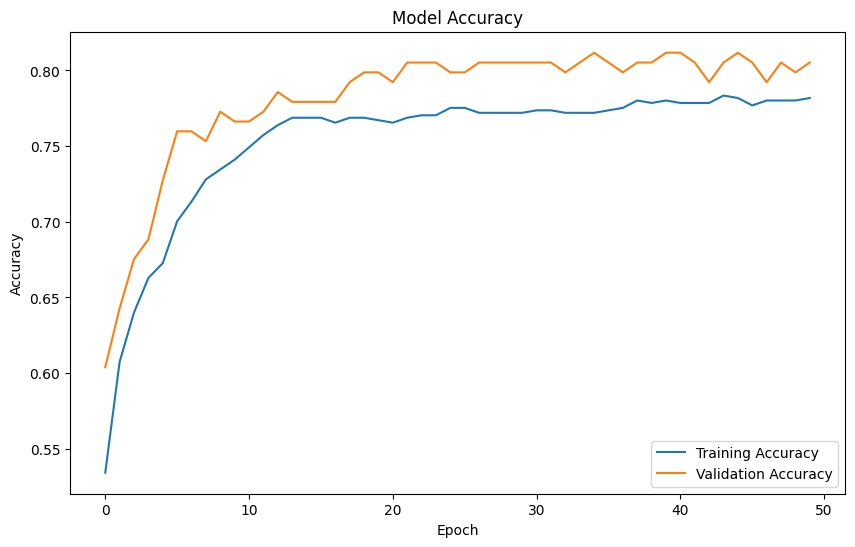

In [5]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Step 5: Evaluate the model

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.4389 - accuracy: 0.8052
Accuracy: 0.8051947951316833


## Step 6: Make predictions

In [7]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output


acc_test = accuracy_score(y_test, predictions)
acc_test

5/5 [==============================] - 0s 3ms/step


0.8051948051948052

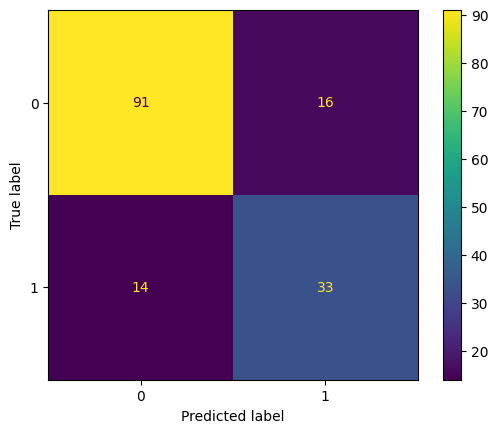

In [8]:
# display training confusion matrix
cm_test = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()

## Challenge: predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

Data Description: \
1) id: unique identifier\
2) gender: "Male", "Female" or "Other"\
3) age: age of the patient\
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) ever_married: "No" or "Yes"\
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) Residence_type: "Rural" or "Urban"\
9) avg_glucose_level: average glucose level in blood\
10) bmi: body mass index\
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"\
12) stroke: 1 if the patient had a stroke or 0 if not

In [32]:
### Load data
df=pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [33]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
### Data preprocessing

# Dropping the columns having missing values
df = df.dropna(axis=1)
## Drop column "id"
df=df.drop(columns=['id'])
# Resetting the indices using df.reset_index()
df = df.reset_index(drop=True)
# Convert categorical variables to numerical
### find categorical variables
categorical_columns=["gender",'ever_married','work_type', 'Residence_type',  'smoking_status','heart_disease']
df = pd.get_dummies(df, columns=categorical_columns)

# Split the dataset into features and labels
X = df.drop(columns=['stroke'])
y = df['stroke']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the continous features
contin=['age','hypertension','avg_glucose_level']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[contin])
X_test = scaler.transform(X_test[contin])



In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                96        
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
128/128 [==============================] - 1s 4ms/step - loss: 0.5192 - accuracy: 0.8224 - val_loss: 0.3907 - val_accuracy: 0.9374
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9547 - val_loss: 0.2503 - val_accuracy: 0.9374
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9547 - val_loss: 0.2131 - val_accuracy: 0.9374
Epoch 4/50
128/128 [==============================] - 0s 3ms/step - loss: 0.1666 - accuracy: 0.9547 - val_loss: 0.2020 - val_accuracy: 0.9374
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9547 - val_loss: 0.1965 - val_accuracy: 0.9374
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9547 - val_loss: 0.1936 - val_accuracy: 0.9374
Epoch 7/50
128/128 [==============================] - 0s 4ms/step - loss: 0.1528 - accuracy: 0.9547 - val_loss: 0.1912 - val_accuracy: 0.9374
Epoch 

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9374
Accuracy: 0.9373776912689209


In [38]:
### Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output


acc_test = accuracy_score(y_test, predictions)
acc_test

32/32 [==============================] - 0s 1ms/step


0.9373776908023483